First we will import the required libraries for our model

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sk

we test somethings randomly

In [64]:
a= np.array([1,2,3])
print(a)
b=np.array([4,5,6])
# plt.scatter(a,b)
# plt.show()

[1 2 3]


IMPORTING THE DATA FOR TRAINING AND TESTING

In [65]:
# DATA-1
da= sk.load_breast_cancer()
x,y= da.data[:500],da.target[:500]
x=np.c_[[1]*500,x]
x_test,y_test= da.data[500:],da.target[500:]
x_test=np.c_[[1]*69,x_test]

#DATA-2
x,y=[],[]
file= open('logical_reg_2.csv','r')
for i in file:
    try:
        l= list(map(float,i.split(',')))
        x.append(l[:-1])
        y.append(float(l[-1]))
    except:
        pass
file.close()
print(len(x),len(y))
x,y=np.c_[[1]*2338,x],np.array(y)
x_test,y_test=x[500:600],y[500:600]
x,y=x[:500],y[:500]
print(len(x[0]))

2338 2338
14


we define the logistic function which takes the value of x and theta as row matrices

In [66]:
def h(x,theta):
    temp= np.transpose(theta)
    # print(temp,temp.shape,theta,theta.shape)
    # print(np.dot(x,temp))
    return 1/(1+np.exp(-np.dot(x,temp)))     # and it returns a scalar in numpy float format and not as an array so it does not have a shape
# x=np.array([1,2,3])
# theta= np.array([1,2,3])
# z=h(x,theta)
# print(z,type(z),z.shape)

now we create a function to train our model and make it return a matrix theta of the parameters

In [67]:
def train(x,y):
    theta= np.array([0]*14)
    alp=0.1
    step=10000
    counter=0
    print(theta)
    print() 

    while  step>0 and counter<100 :
        thetaprev= theta.copy()
        h_= np.array([h(j,theta) for j in x])
        h_= np.transpose(y-h_)
        # print(h_,'*')
        for i in range(14):
            x_=x[:,i]
            x_= np.dot(x_,h_)
            theta[i]+=alp*x_
        # print(theta)
        step= sum(abs(theta-thetaprev))
        print(step)
        print()
        if counter>20:
            alp-=0.01
        counter+=1
    return theta

Now we test our code over the testing data

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]

232

4087

4669

4441

4671

4441

4673

4442

4674

4430

4674

4400

4674

4400

4674

4400

4656

4371

4411

4334

4212

4194

3680

2842

1327

712

316

125

89

53

27

0

25 *****


C:\Users\nitu2\AppData\Local\Temp\ipykernel_17452\232841674.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-np.dot(x,temp)))     # and it returns a scalar in numpy float format and not as an array so it does not have a shape


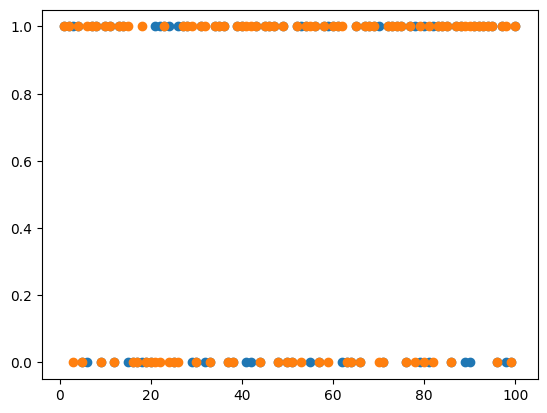

In [68]:
arbitrary= np.array([i for i in range(1,len(y_test)+1)])
plt.scatter(arbitrary,y_test)
th= train(x,y)
predicted=[]
for i in x_test:
    predicted.append((h(i,th)))
predicted= np.array(predicted)
plt.scatter(arbitrary,predicted)
yp= list(y_test-predicted)
print(len(yp)-yp.count(0),'*****')
plt.show()